# Checking for Required packages

In [1]:
import pkg_resources
pkg_resources.get_distribution("cmapPy").version

'4.0.1'

In [2]:
pkg_resources.get_distribution("seaborn").version

'0.10.0'

In [3]:
import sklearn
print (sklearn.__version__)

0.22.2.post1


# Reading the GCT file

In [4]:
from cmapPy.pandasGEXpress.parse import parse
filepath = "PAAD.gct"
data = parse(filepath)

C:\Users\Kedar\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
# Read all portion of data
columns_data = data.col_metadata_df
rows_data = data.row_metadata_df
genes_data = data.data_df

In [6]:
columns_data.head()

chd,participant_id,sample_type,mRNAseq_cluster,bcr_patient_barcode,bcr_patient_uuid,vital_status,days_to_death,days_to_last_followup,additional_studies,adenocarcinoma_invasion,...,tobacco_smoking_history,total_dose,total_dose_units,tumor_tissue_site,tumor_type,withdrawn,year_of_dcc_upload,year_of_form_completion,year_of_initial_pathologic_diagnosis,year_of_tobacco_smoking_onset
cid,,,,,,,,,,,,,,,,,,,,,
aab1-Primary solid Tumor,aab1,Primary solid Tumor,1.0,tcga-2j-aab1,75119d1a-93e5-4ae7-9d60-69ee929a0772,dead,66.0,NaN,NaN,yes,...,3.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,1962.0
aab4-Primary solid Tumor,aab4,Primary solid Tumor,2.0,tcga-2j-aab4,33833131-1482-42d5-9cf5-01cade540234,alive,NaN,729.0,NaN,yes,...,5.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab6-Primary solid Tumor,aab6,Primary solid Tumor,3.0,tcga-2j-aab6,70797499-16e6-48cc-8ae4-1e692713dad3,dead,293.0,NaN,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab8-Primary solid Tumor,aab8,Primary solid Tumor,1.0,tcga-2j-aab8,2e8f90f4-aed3-43b0-985c-dfdc2581f24f,alive,NaN,80.0,NaN,yes,...,NaN,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN
aab9-Primary solid Tumor,aab9,Primary solid Tumor,4.0,tcga-2j-aab9,a5748656-5330-417a-8938-01f69ddb3576,dead,627.0,NaN,NaN,yes,...,1.0,NaN,NaN,pancreas,primary,false,2016,2014,2012.0,NaN


In [7]:
rows_data.head()

rhd
rid
SLC35E2
A1BG
A1CF
A2BP1
A2LD1


In [8]:
columns_data.shape

(183, 124)

In [9]:
rows_data.shape

(18465, 0)

# Missing Values

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Total 86 columns have missing value, and Total 9659 missing values in dataset


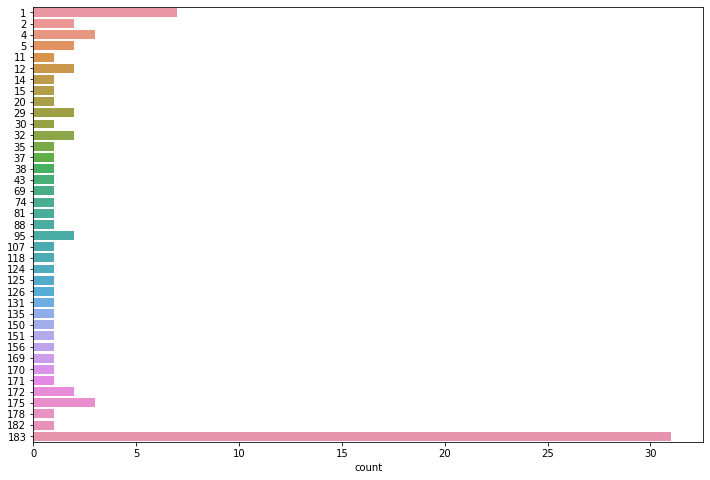

In [11]:
# Number of missing values in each column of columns_data
missing_val_count = (columns_data.isnull().sum()).sort_values(ascending=False)
Total_columns_missing_value = missing_val_count[missing_val_count > 0]

print(f"Total {len(Total_columns_missing_value)} columns have missing value, and",
      f"Total {Total_columns_missing_value.sum()} missing values in dataset")
plt.figure(figsize=(12, 8))
sns.countplot(data=Total_columns_missing_value, y= Total_columns_missing_value)

In [12]:
# Explore each columns of columns_data
for col in columns_data.columns:
    print(f"{col}:   {len(columns_data[col].unique())} unique values:")

participant_id:   178 unique values:
sample_type:   3 unique values:
mRNAseq_cluster:   6 unique values:
bcr_patient_barcode:   178 unique values:
bcr_patient_uuid:   178 unique values:
vital_status:   2 unique values:
days_to_death:   90 unique values:
days_to_last_followup:   85 unique values:
additional_studies:   1 unique values:
adenocarcinoma_invasion:   2 unique values:
age_at_initial_pathologic_diagnosis:   45 unique values:
alcohol_history_documented:   3 unique values:
alcoholic_exposure_category:   6 unique values:
amount_of_alcohol_consumption_per_day:   7 unique values:
anatomic_neoplasm_subdivision:   4 unique values:
anatomic_neoplasm_subdivision_other:   11 unique values:
b_symptoms:   1 unique values:
bcr:   1 unique values:
bcr_aliquot_uuid:   178 unique values:
bcr_canonical_reason-2:   2 unique values:
bcr_canonical_reason-3:   2 unique values:
bcr_canonical_reason:   4 unique values:
bcr_followup_barcode:   151 unique values:
bcr_followup_uuid:   151 unique values:

In [13]:
# drop columns which have constant value
for col in columns_data.columns:
    if len(columns_data[col].unique())<2:
        columns_data.drop(columns=col, inplace=True)

In [14]:
columns_data.shape

(183, 83)

Total 55 columns have missing value, and Total 3986 missing values in dataset


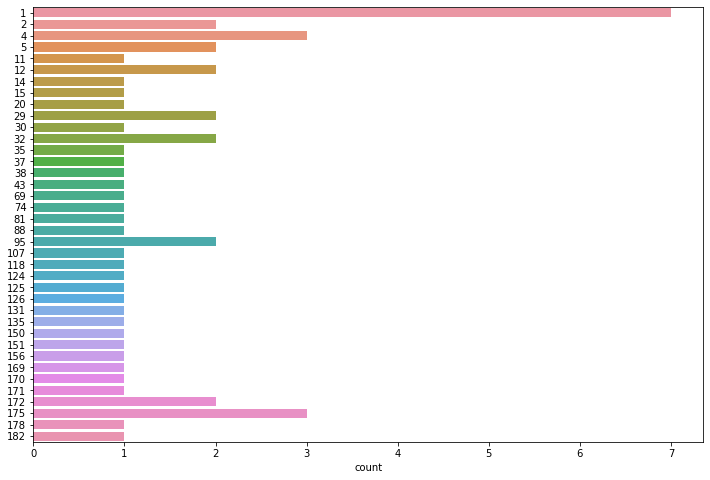

In [15]:
# Number of missing values in each column of columns_data
missing_val_count = (columns_data.isnull().sum()).sort_values(ascending=False)
Total_columns_missing_value = missing_val_count[missing_val_count > 0]

print(f"Total {len(Total_columns_missing_value)} columns have missing value, and",
      f"Total {Total_columns_missing_value.sum()} missing values in dataset")
plt.figure(figsize=(12, 8))
sns.countplot(data=Total_columns_missing_value, y= Total_columns_missing_value)

# Exploratory Data Analysis

In [16]:
columns_data.columns

Index(['participant_id', 'sample_type', 'mRNAseq_cluster',
       'bcr_patient_barcode', 'bcr_patient_uuid', 'vital_status',
       'days_to_death', 'days_to_last_followup', 'adenocarcinoma_invasion',
       'age_at_initial_pathologic_diagnosis', 'alcohol_history_documented',
       'alcoholic_exposure_category', 'amount_of_alcohol_consumption_per_day',
       'anatomic_neoplasm_subdivision', 'anatomic_neoplasm_subdivision_other',
       'bcr_aliquot_uuid', 'bcr_canonical_reason-2', 'bcr_canonical_reason-3',
       'bcr_canonical_reason', 'bcr_followup_barcode', 'bcr_followup_uuid',
       'bcr_patient_canonical_status', 'day_of_form_completion',
       'days_to_birth', 'days_to_diabetes_onset', 'days_to_index',
       'days_to_initial_pathologic_diagnosis', 'days_to_pancreatitis_onset',
       'ethnicity', 'family_history_of_cancer', 'file_uuid',
       'followup_case_report_form_submission_reason',
       'followup_treatment_success', 'frequency_of_alcohol_consumption',
       'gende

In [17]:
columns_data.sample_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: sample_type, dtype: int64

In [18]:
columns_data.vital_status.value_counts()

dead     95
alive    88
Name: vital_status, dtype: int64

In [19]:
columns_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

No handles with labels found to put in legend.


RNA sequence cluster:3.0 types patient is 24.16% of total 
RNA sequence cluster:4.0 types patient is 22.47% of total 
RNA sequence cluster:1.0 types patient is 21.91% of total 
RNA sequence cluster:5.0 types patient is 16.85% of total 
RNA sequence cluster:2.0 types patient is 14.61% of total 


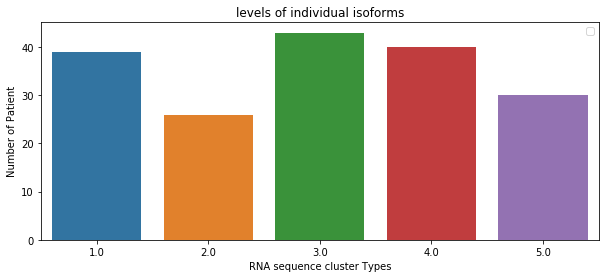

In [20]:
conts_mRNA = columns_data.mRNAseq_cluster.value_counts()
plt.figure(figsize=(10,4))
sns.barplot(x=conts_mRNA.index,y=conts_mRNA.values,)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('levels of individual isoforms')
plt.legend()
for i, index in enumerate(conts_mRNA.index):
    val = conts_mRNA.values[i]
    val_pcn = round(((val)/sum(conts_mRNA.values))*100, 2)
    print(f"RNA sequence cluster:{index} types patient is {val_pcn}% of total ")

Text(0.5, 1.0, 'Vital status of patient by mRNA sequence cluster types ')

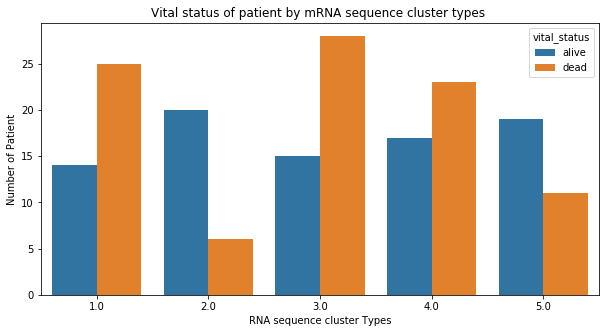

In [21]:
mRNA_seq_group = columns_data.groupby(['mRNAseq_cluster', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='mRNAseq_cluster', y='counts', hue='vital_status', data=mRNA_seq_group)
plt.ylabel('Number of Patient')
plt.xlabel('RNA sequence cluster Types')
plt.title('Vital status of patient by mRNA sequence cluster types ')

In [22]:
columns_data.sample_type.value_counts()

Primary solid Tumor    178
Solid Tissue Normal      4
Metastatic               1
Name: sample_type, dtype: int64

Text(0.5, 1.0, 'Vital status vs cancer type ')

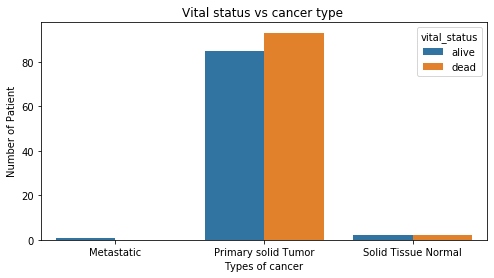

In [23]:
sample_type_group = columns_data.groupby(['sample_type', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(8, 4))
sns.barplot(x='sample_type', y='counts', hue='vital_status', data=sample_type_group)
plt.ylabel('Number of Patient')
plt.xlabel('Types of cancer')
plt.title('Vital status vs cancer type ')

In [24]:
columns_data.adenocarcinoma_invasion.value_counts()

yes    182
no       1
Name: adenocarcinoma_invasion, dtype: int64

In [25]:
columns_data.maximum_tumor_dimension.unique()

array([ 4.5,  6.8,  5. ,  3.5,  4. ,  4.3,  5.8,  3.2,  2.2,  2.8,  4.6,
        7.2,  3.3,  4.1, 12. ,  3. , 14. ,  nan,  2.5,  2. ,  1.3,  8. ,
        4.2,  5.5,  3.6,  4.8,  3.8,  2.7,  6. ,  9. ,  3.1,  6.5,  4.7,
        1.8,  3.4,  0.3,  2.3,  2.9,  2.4,  7. ,  2.1,  3.7])

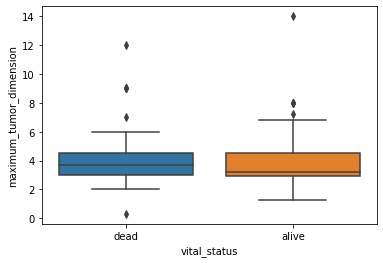

In [26]:
sns.boxplot(x='vital_status', y='maximum_tumor_dimension', data=columns_data)

In [27]:
columns_data.pathologic_stage.value_counts()

stage iib    122
stage iia     29
stage ib      15
stage ia       5
stage iv       5
stage iii      4
stage i        1
Name: pathologic_stage, dtype: int64

In [28]:
columns_data.shape

(183, 83)

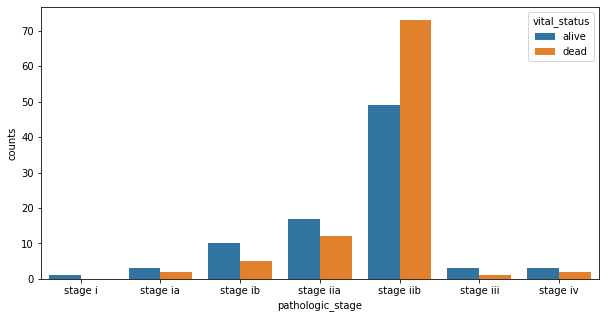

In [29]:
pathologic_stage_group = columns_data.groupby(['pathologic_stage', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_stage', y='counts', hue='vital_status', data=pathologic_stage_group)

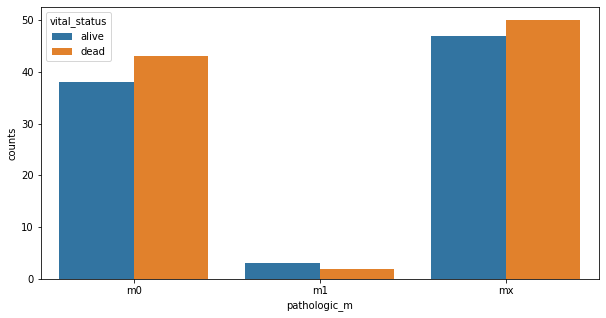

In [30]:
pathologic_m_group = columns_data.groupby(['pathologic_m', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_m', y='counts', hue='vital_status', data=pathologic_m_group)

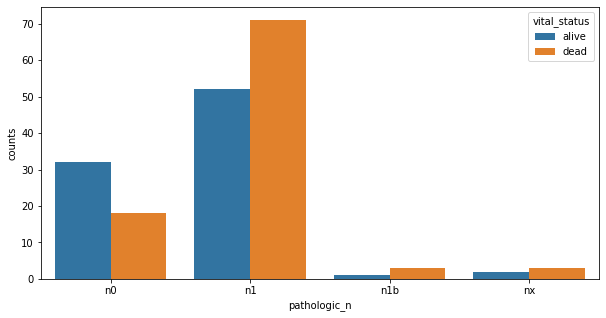

In [31]:
pathologic_n_group = columns_data.groupby(['pathologic_n', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_n', y='counts', hue='vital_status', data=pathologic_n_group)

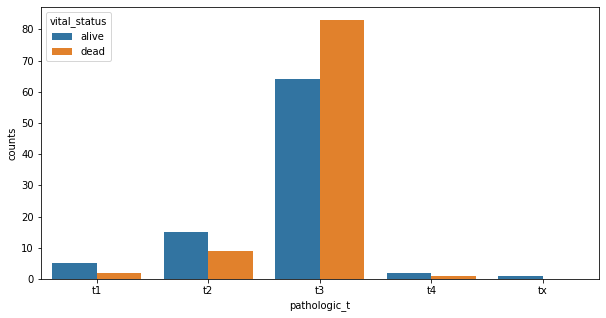

In [32]:
pathologic_t_group = columns_data.groupby(['pathologic_t', 'vital_status'])['vital_status'].count().reset_index(name='counts')
plt.figure(figsize=(10, 5))
sns.barplot(x='pathologic_t', y='counts', hue='vital_status', data=pathologic_t_group)

In [33]:
genes_data = data.data_df

In [34]:
genes_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


Total 183 columns have missing value, and Total 134954 missing values in dataset


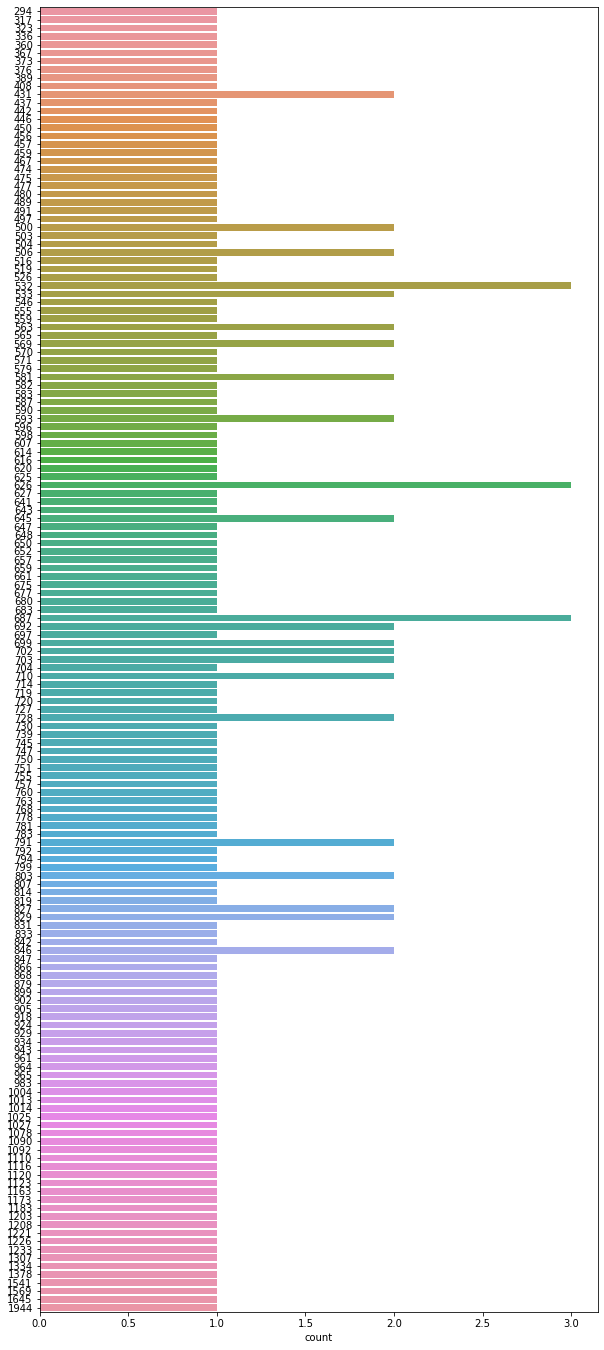

In [35]:
# Number of missing values in each column of columns_data
missing_val_count = (genes_data.isnull().sum()).sort_values(ascending=False)
Total_columns_missing_value = missing_val_count[missing_val_count > 0]

print(f"Total {len(Total_columns_missing_value)} columns have missing value, and",
      f"Total {Total_columns_missing_value.sum()} missing values in dataset")
plt.figure(figsize=(10, 24))
sns.countplot(data=Total_columns_missing_value, y= Total_columns_missing_value)

In [37]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_my_data = pd.DataFrame(my_imputer.fit_transform(genes_data))

# Fill in the lines below: imputation removed column names; put them back
imputed_my_data.columns = genes_data.columns
imputed_my_data.index = genes_data.index

imputed_my_data.head()

cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.200000,8.000000,7.65,8.100000,8.200000,8.2,7.55,8.450000,...,8.45,7.95,8.3,8.050000,8.2,7.25,7.4,7.350000,7.2,9.050000
A1BG,6.40,5.8,6.400000,5.800000,6.70,6.600000,6.300000,6.5,5.70,6.300000,...,7.10,7.10,6.7,7.000000,6.9,7.10,7.3,7.900000,6.0,6.900000
A1CF,4.70,5.7,3.000000,5.100000,4.40,4.200000,1.600000,6.8,6.00,7.431307,...,5.40,6.40,6.5,4.400000,3.3,3.60,6.2,1.200000,4.9,2.000000
A2BP1,-1.00,1.1,7.577068,7.728812,0.10,7.664174,7.628676,1.7,0.40,-1.500000,...,3.50,1.30,-0.3,7.685606,2.1,2.00,0.0,7.540936,2.0,7.660113
A2LD1,7.50,6.8,7.300000,7.500000,7.40,6.600000,7.100000,6.8,8.00,5.800000,...,6.50,7.30,6.1,6.700000,6.5,6.70,6.7,6.500000,6.9,6.700000


In [38]:
# Number of missing values in each column of columns_data
missing_val_count = (imputed_my_data.isnull().sum()).sort_values(ascending=False)
Total_columns_missing_value = missing_val_count[missing_val_count > 0]

print(f"Total {len(Total_columns_missing_value)} columns have missing value, and",
      f"Total {Total_columns_missing_value.sum()} missing values in dataset")

Total 0 columns have missing value, and Total 0 missing values in dataset


In [40]:
print(len(genes_data.columns.unique()))
print(len(columns_data.index.unique()))

183
183


In [41]:
participant_id = columns_data.participant_id
target_variable = columns_data.sample_type
col_meta_data = columns_data.set_index('participant_id')
imputed_my_data = imputed_my_data.rename(columns=participant_id).T
imputed_my_data.head()

rid,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22
cid,,,,,,,,,,,,,,,,,,,,,
aab1,7.45,6.4,4.7,-1.000000,7.5,6.400000,14.3,10.6,8.8,1.000000,...,8.6,6.2,9.0,9.9,7.600244,9.2,12.9,10.1,9.3,5.5
aab4,8.10,5.8,5.7,1.100000,6.8,7.639954,14.0,10.2,5.6,-1.200000,...,8.8,5.8,8.5,10.0,7.639954,9.3,12.4,9.8,8.9,4.5
aab6,7.20,6.4,3.0,7.577068,7.3,10.800000,13.1,10.1,0.2,0.200000,...,9.1,3.9,8.1,10.0,-0.800000,9.4,13.5,9.8,9.2,4.7
aab8,8.00,5.8,5.1,7.728812,7.5,4.100000,13.8,8.6,3.2,-0.100000,...,8.9,5.2,8.5,9.7,1.900000,9.4,12.5,9.7,9.3,6.4
aab9,7.65,6.7,4.4,0.100000,7.4,9.300000,14.6,10.1,5.7,7.796027,...,8.4,5.9,8.6,9.9,0.100000,9.3,13.0,10.1,9.2,4.9


In [42]:
col_to_merge = ['sample_type', 'mRNAseq_cluster','adenocarcinoma_invasion', 'vital_status', 'maximum_tumor_dimension', 'pathologic_stage', 'pathologic_m', 'pathologic_n', 'pathologic_t']

#Join with the genes data
imputed_my_data = imputed_my_data.join(col_meta_data[col_to_merge])

In [43]:
imputed_my_data.head()

,SLC35E2,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,...,psiTPTE22,sample_type,mRNAseq_cluster,adenocarcinoma_invasion,vital_status,maximum_tumor_dimension,pathologic_stage,pathologic_m,pathologic_n,pathologic_t
6879,7.85,4.5,7.3,-0.8,6.3,7.404233,12.9,7.3,4.500000,2.60000,...,5.2,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,m0,n1,t3
6880,9.10,6.2,7.5,0.3,8.9,0.300000,14.1,8.0,6.700000,7.74261,...,6.3,Primary solid Tumor,4.0,yes,alive,2.2,stage iib,m0,n1,t3
7273,8.20,6.3,7.7,2.2,5.9,-0.300000,15.6,9.1,3.400000,0.70000,...,7.3,Primary solid Tumor,4.0,yes,dead,4.2,stage iib,m0,n1,t3
7276,8.45,5.8,5.8,1.4,6.2,-1.600000,14.8,9.1,5.000000,-1.60000,...,5.3,Primary solid Tumor,4.0,yes,dead,5.5,stage iib,m0,n1,t3
7289,8.00,5.2,8.2,3.2,6.3,7.305909,10.1,10.0,7.305909,-0.90000,...,-0.9,Primary solid Tumor,1.0,yes,dead,4.5,stage iib,mx,n1,t3


In [44]:
def cat_to_numeric(x):
    if x=='Solid Tissue Normal':
        return 0
    elif x=='Primary solid Tumor':
        return 1
    else:
        return 2
target_variable = target_variable.map(lambda x: cat_to_numeric(x))

Total 5 columns have missing value, and Total 30 missing values in dataset


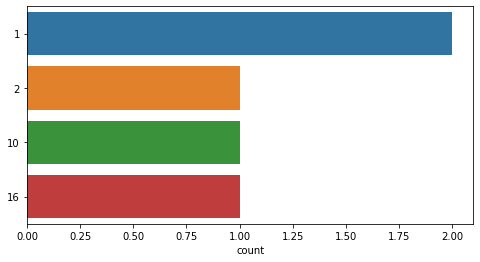

In [45]:
# Number of missing values in each column of columns_data
missing_val_count = (imputed_my_data.isnull().sum()).sort_values(ascending=False)
Total_columns_missing_value = missing_val_count[missing_val_count > 0]

print(f"Total {len(Total_columns_missing_value)} columns have missing value, and",
      f"Total {Total_columns_missing_value.sum()} missing values in dataset")
plt.figure(figsize=(8, 4))
sns.countplot(data=Total_columns_missing_value, y= Total_columns_missing_value)

In [46]:
def remove_nulls(df):

    rows = df.shape[0]
    columns = df.shape[1]
    null_cols = 0
    list_of_nulls_cols = []
    for col in list(df.columns):
        null_values_rows = df[col].isnull().sum()
        null_rows_pcn = round(((null_values_rows)/rows)*100, 2)
        col_type = df[col].dtype
        if null_values_rows > 0:
            print("The column {} has {} null values. It is {}% of total rows.".format(col, null_values_rows, null_rows_pcn))
            print("The column {} is of type {}.\n".format(col, col_type))
            null_cols += 1
            list_of_nulls_cols.append(col)
            df[[col]] = df[[col]].apply(lambda x: x.fillna(method='backfill'))
            print(f"The column {col} has removed {null_values_rows} null values")
    null_cols_pcn = round((null_cols/columns)*100, 2)
    print("The DataFrame has {} columns with null values. It is {}% of total columns.".format(null_cols, null_cols_pcn))
    return df

my_data = remove_nulls(imputed_my_data.select_dtypes(exclude='object'))


The column mRNAseq_cluster has 10 null values. It is 5.18% of total rows.
The column mRNAseq_cluster is of type float64.

The column mRNAseq_cluster has removed 10 null values
The column maximum_tumor_dimension has 16 null values. It is 8.29% of total rows.
The column maximum_tumor_dimension is of type float64.

The column maximum_tumor_dimension has removed 16 null values
The DataFrame has 2 columns with null values. It is 0.01% of total columns.


C:\Users\Kedar\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [47]:
imputed_my_data.isnull().sum().sum()

30

In [48]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(imputed_my_data.drop(columns=col_to_merge))

from sklearn.decomposition import PCA as sklearnPCA
n_components = 100
sklearn_pca = sklearnPCA(n_components=n_components)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [49]:
X_std.shape

(193, 18465)

# Variance of the PCA

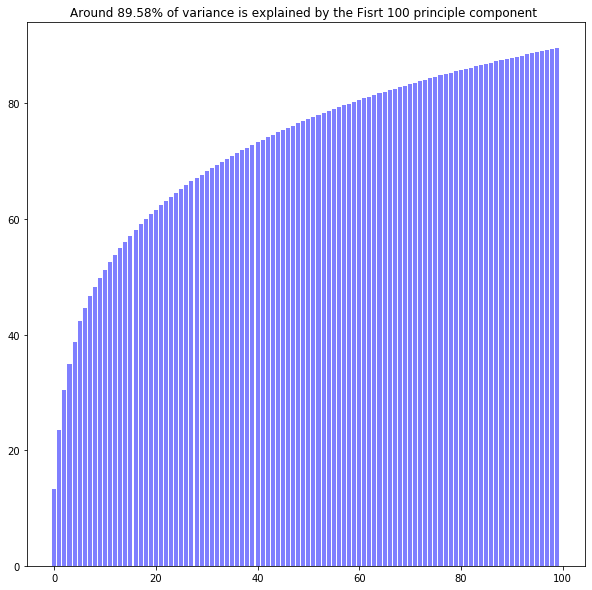

In [50]:
cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

explained_var = round(sklearn_pca.explained_variance_ratio_.sum()*100, 2)

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(10,10))
plt.bar(range(n_components), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title(f"Around {explained_var}% of variance is explained by the Fisrt {n_components} principle component ");

# Visualize the data whole data using PCA.

[]

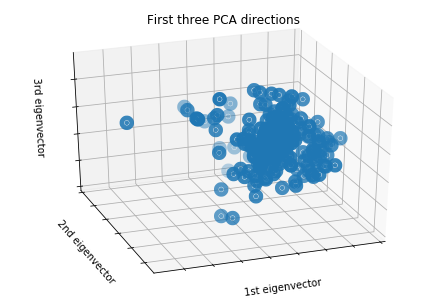

In [51]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=3)
X_reduced  = sklearn_pca.fit_transform(X_std)
Y=target_variable
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure(1, figsize=(10,6 ))
ax = Axes3D(fig, elev=-150, azim=110,)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],cmap=plt.cm.Paired,linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

# Adenocarcinoma Tumor

Text(0.5, 1.0, 'This The 2D Transformation of above graph ')

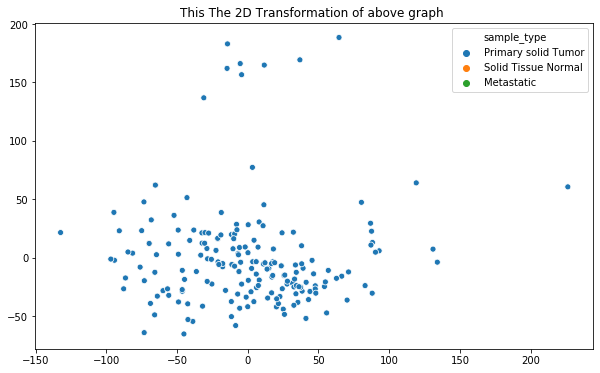

In [52]:
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_my_data['sample_type'])
plt.title("This The 2D Transformation of above graph ")

In [53]:
imputed_my_data = imputed_my_data[imputed_my_data['adenocarcinoma_invasion']=='yes']
imputed_my_data.shape

(192, 18474)

In [54]:
ifn_sig = pd.read_csv('type1_IFN.txt', header=None)
ifn_sig.columns = ['member']
ifn_sig.head()

,member
0,IFIT1
1,IFI44
2,IFIT3
3,MX2
4,OAS1


In [55]:
ifn_sig_data = imputed_my_data[ifn_sig['member'].to_list()]
ifn_sig_data.shape

(192, 25)

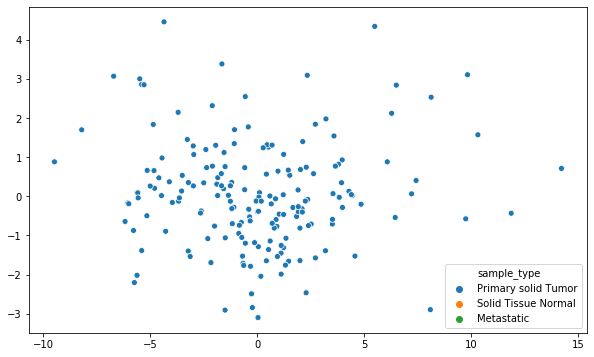

In [56]:
X_std = StandardScaler().fit_transform(ifn_sig_data)
n_components = 2
sklearn_pca = sklearnPCA(n_components=n_components)
X_reduced  = sklearn_pca.fit_transform(X_std)
fig = plt.figure(1, figsize=(10,6))
sns.scatterplot(X_reduced[:, 0],  X_reduced[:, 1],hue=imputed_my_data['sample_type'])

# GSVA

In [57]:
from GSVA import gsva
from plotnine import *
from sklearn.manifold import TSNE

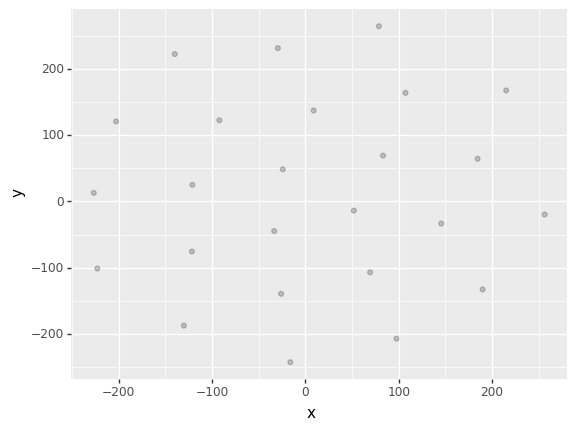

<ggplot: (37630139028)>

In [59]:
XV = TSNE(n_components=2).\
    fit_transform(ifn_sig_data.T)
df = pd.DataFrame(XV).rename(columns={0:'x',1:'y'})
(ggplot(df,aes(x='x',y='y'))
 + geom_point(alpha=0.2)
)

In [68]:
columns_data.histological_type_other.unique()

array(['invasive adenocarcinoma', 'invasive, well-differentiated', nan,
       'poorly differentiated adenocarcinoma', 'neuroendocrine',
       'neuroendocrine carcinoma nos',
       '82463 neuroendocrine carcinoma nos', 'neuroendocrine carcinoma',
       'adenocarcinoma, nos',
       'poorly differentiated pancreatic adenocarcinoma', 'not specified',
       'intraductal tubulopapillary neoplasm',
       'ductal and micropapillary', 'adenocarcinoma- nos',
       'moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40%'],
      dtype=object)

In [71]:
columns_data.adenocarcinoma_invasion.unique

<bound method Series.unique of cid
aab1-Primary solid Tumor    yes
aab4-Primary solid Tumor    yes
aab6-Primary solid Tumor    yes
aab8-Primary solid Tumor    yes
aab9-Primary solid Tumor    yes
                           ... 
a89d-Solid Tissue Normal    yes
a89d-Primary solid Tumor    yes
a8sy-Primary solid Tumor    yes
a8lh-Primary solid Tumor    yes
aapl-Primary solid Tumor    yes
Name: adenocarcinoma_invasion, Length: 183, dtype: object>

AttributeError: 'AxesSubplot' object has no attribute 'T'

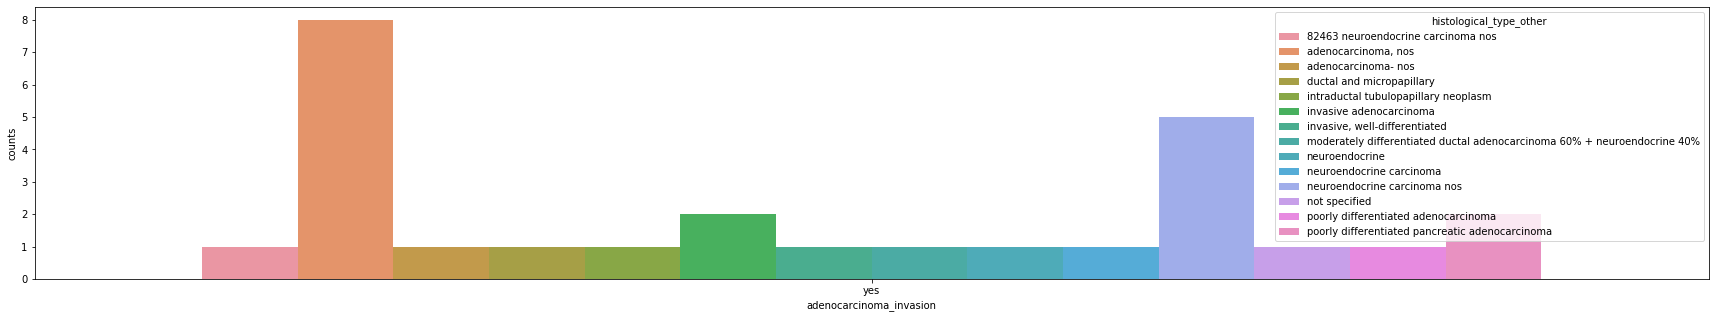

In [75]:
pathologic_stage_group = columns_data.groupby(['adenocarcinoma_invasion', 'histological_type_other'])['histological_type_other'].count().reset_index(name='counts')
plt.figure(figsize=(30, 5))
sns.barplot(x='adenocarcinoma_invasion', y='counts', hue='histological_type_other', data=pathologic_stage_group).T

In [ ]:
# Yes, the neuroendocrine tumors clearly separable from the adenocarcinoma tumors.